# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

- No, the smartcab stands still.
- It gets a reward when the traffic light is red for standing idle and it gets penalty when the light is green for not moving on. The penalty is more than the double of the reward. (I don't see any traffic light on the map, I am commenting based on the text notification.)
- Smartcab is rewarded for staying idle at red light and penalized for staying idle at green light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

- The parameters of Agent's class are "learning" (to specify whether the agent is expected to learn - boolean), "epsilon" (Exploration factor for epsilon greedy policy. In order to balance between exploration and exploitation, we set an epsilon value to determine the random exploration ratio.) and "alpha" learning factor (Determines the weight of the new learned Q(s,a). If it is zero, the agent won't learn from future experiences. If it converges to 1, new learned experience will override the past experience. The value determines the ratio between past experience and new experience).
- act(agent, action) is called. 
- render_text() displays the simulation data at terminal (non-GUI environment). render() function is for the GUI render of the simulation in order to display the simulation data at pygame window.
- First East-West direction.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


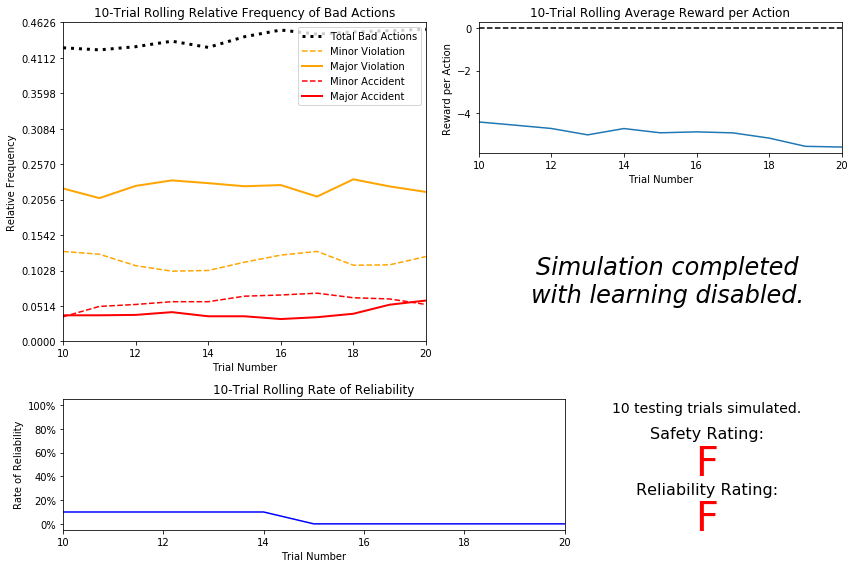

In [33]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Almost half of the time agent is making a bad decision and about 10% of total actions cause accidents. Beucase of the agent is not learning and following random decisions, the simulation results in a persistent low reliability. The agent fails to reach to the destination on time at every 9 out of 10 or all of the journeys. Also due to that not learning state, the outcomes of results don't change significantly as number of trials increases. 

The agent gets either positive or negative rewards based on the outcome of its actions. If the action is right it gets a positive a reward. If the action is a violation of a rule or causes an accident, the agent is penalized with a negative reward. When we observe the trials of our agent, we see a negative value for reward per action. This means that our agent got more negative rewards than positive rewards based on its random actions. Also when we look at the step logs at console, the agent gets much higher negative rewards than positive rewards. 

This smartcab is not safe nor reliable which is also seen by the safety and reliability ratings with an F score. It is not safe because half of its actions are bad decisions and it has a 10% chance of making an accident. It is also not reliable because it can reach to destination on time just at 0-10% of its journeys. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

**waypoint:** Not relevant for safety but relevant for efficiency. Because it shows the direction of the destination based on the current location of the agent in the grid system. If there were no other agents and red lights, it would lead to the most efficient route. But the real world doesn't work in that way. Additional to the waypoint, you need to take traffic density and even the number of light into the account. But also, if we ignore the waypoint, the agent would try to maximize the number of turn in order to maximize the reward. 

**light:** It is relevant for both safety and efficiency. If you violate a red light, it will most likely result in an accident. Also using a lane which has green lights mostly (e.g. a large street) will increase the efficient.

**left:** This feature is relevant for safety and not relevant for efficiency. For the actions going forward or turning left, as long as we obey the traffic rules, an agent to our left won't cause an accident. If our agent intends to turn right and the agent to left goes forward, a collision will happen. Therefore we need to consider the input left when we are going to turn right (unless it is green light for us).

**right:** As long as our agent obeys the traffic light, an agent to our right direction won't cause a safety issue (I assume that there is no u-turn). It is also not relevant for efficiency. Therefore, this feature can be excluded. 

**oncoming:** After the light, it is the most important input for safety. Even though the light is green, if there is an oncoming agent and our agent wants to turn left, a collision will happen if the agent is ignored. But it is not relevant for efficieny.

**deadline:**  Deadline shows how many turns are left to reach to the destination on time. It is a direct indicator for the efficiency but it doesn't carry out an information to learn. Because of that the safety is the major priority, the agent won't disobey the traffic rules when the deadline is about to finish. Rather than the deadline, it would be more appropriate to reward the duration of the journey so our agent can learn the optimal routes and behaviors with maximum safety. We can exclude it from the states parameters. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

I would choose waypoint(3), light(2), left(4) and oncoming(4) features to take into account. They would make 2ˆ5 * 3 = 96 states. If other agents are following the traffic rules strictly, primary agent can't learn every 96 of these states. For example, the agent to the left won't go forward if the light is green for our smartcab. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

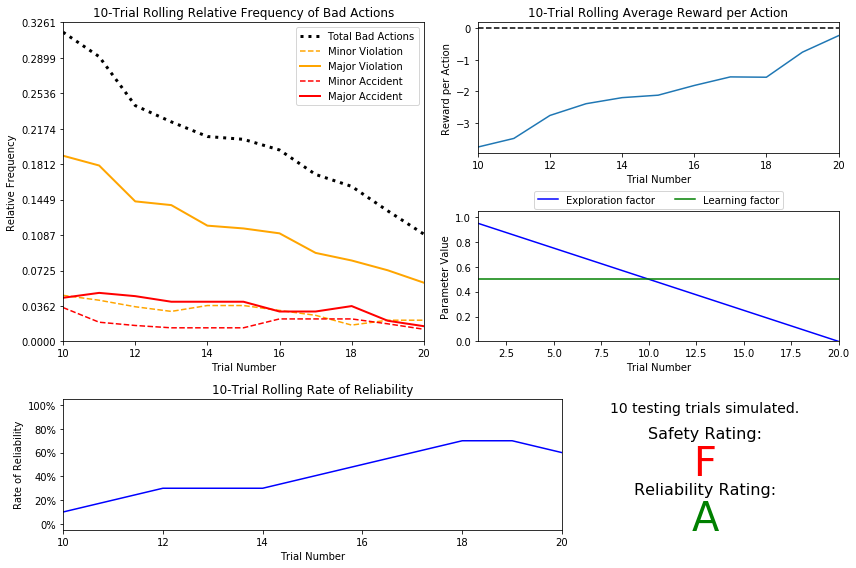

In [36]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Our agent started with an epsilon value 1 and it has decayed linearly at every trial. While our agent acts in a random behaviour at the early trials, it starts to decrease the proportion of random actions and increase the decisions based on experience. Due to that, we observe an incrementing reward and reliability performance and descending bad actions frequency as the trials and actions based on learnings increase. 

As we have stated, at the early trials our agent decides its actions randomly. Therefore we observe similar performance metrics as basic driving agent. As the trials increase, metrics between two agents diverge.

Our agent required 20 training trials due to the epsilon decaying function that we have implemented. Our simulation ends training trials and start testing trials as the epsilon value goes below the tolerance value that we have set at the simulation.py file which is 0.05. Epsilon decaying function was decrementing the epsilon value by 0.05 after every trials. After 20 trials epsilon value reaches the zero and simulation starts its testing sessions. We can also easily observe the linear decreasing of the epsilon value from the parameters panel.

As stated in the first paragraph, the number of bad actions decrease as the number of trials increase due to learning and applying what has been learned. Thus the number of good actions also increase and therefore average reward per action increase. 

After implementing default Q-learning, reliability score became A. It was F at basic driving agent to due acting randomly. Default Q-learner agent takes the waypoint as an input and therefore it follows a much more reliable route. Compared to the basic agent, frequency of violations and accidents decreased significantly but the chance of making a major accident or major violation remains. Due to that the safety score is still F.  

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

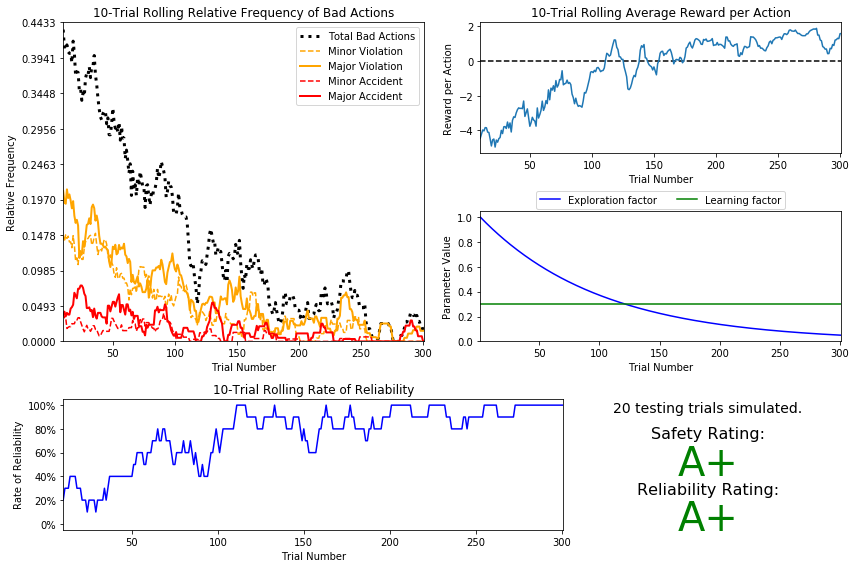

In [26]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

I have used eˆ-(0.01 * t) as the epsilon decaying function and 0.05 as the tolerance threshold. This setting requires the agent to complete 300 training trials before testing. The reason why I have chosen 0.05 as the tolerance level is, even if it is a small probability, I wanted to give the chance of exploration if the agent has learned a local optima for a state. I have chosen 0.3 as the learning rate alpha because the range 0.3 - 0.4 was giving the optimal scores after my random trials between 0.1-0.9. Also I have figured out that, along with the learning rate, the main parameter that improves the safety and reliability is the number of training trails. Therefore I have set the decaying function to result 300 trials which resulted A+ score for safety and A+ score for reliability. 

With the optimized Q-learning, our safety score increased to A+ from F and reliability score to A+ from A. With the perfect scores for both safety and reliability, I am satisfied with the performance of my smartcab.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:**

1 - Due to the traffic laws and common sense, we can define a deterministic optimal policy. For example if it is a red light state, the agent should stop and do nothing in any case regardless of other inputs. If the agent is going to turn right at red light, the right of way belongs the cars passing across at green light ('wayp':'right', 'light':'red', 'left': 'forward'). Else, it can turn right. If the light is green,  the agent will follow its waypoint unless the waypoint is left and the car at across turns to its right (it has the right of way).

2 - After the examinating the learned policies, all the records are not same with the optimal policy. There are some local optimas observed in the file. For example, policies below don't match with the optimal policy.

('left', 'red', 'right', 'forward') --> action should be None

 -- forward : 0.00
 -- left : -5.26
 -- right : 0.86
 -- None : 0.00
 
 ('forward', 'red', 'right', 'forward') --> action should be None
 
 -- forward : 0.00
 -- left : -4.95
 -- right : 0.58
 -- None : 0.00
 
 ('left', 'red', 'right', 'right') --> action should be None
 
 -- forward : -3.03
 -- left : -12.15
 -- right : 0.44
 -- None : 0.00
 
 ('forward', 'green', 'left', 'left') --> action should be forward
 
 -- forward : 0.51
 -- left : 0.43
 -- right : 0.74
 -- None : -4.36
 
 ('left', 'green', None, 'forward') --> action forward would be more logical due to the wp
 
 -- forward : 0.44
 -- left : -17.68
 -- right : 1.21
 -- None : -4.30
 
 ('right', 'green', 'right', 'left') --> action should be right
 
 -- forward : 0.51
 -- left : 0.00
 -- right : 0.00
 -- None : -1.47
 
3 - The light is green and our smartcab has the right of way to go right. Left action causes a major accidendt (as also can be seen from the penalty) and None is a violation which also results in penalty.
 
 ('right', 'green', 'left', 'forward')
 
 -- forward : 0.00
 -- left : -13.22
 -- right : 1.50
 -- None : -2.78
 
 Going any direction in this case would cause major accident and violation because the light is red and the agent to left goes forward. It is also seen from the state that action right has a negative q-value. 
 
 ('right', 'red', 'forward', None)
 
 -- forward : -20.11
 -- left : -26.22
 -- right : -10.20
 -- None : 0.32
 
 Light is green and waypoint is forward therefore the right and valid action is to go forward. 
 
 ('forward', 'green', None, 'forward')
 
 -- forward : 1.82
 -- left : -19.30
 -- right : 0.46
 -- None : -4.34

4 -  At the entry below, the smartcab moved to right when it should do nothing and wait the light to be green to go forward. The reason of this situation is probably due to finding a local optima during exploration. During the exploration, the smartcab turned right at this state and got a reward for its valid action while it isn't valid move due to the waypoint. Because of the penalty from invalid move was less than the reward of valid action, state-action pair gained a positive q-value which led to a local optima. In order to prevent this, penalty from invalid move can be increased.

 ('forward', 'red', 'right', 'forward') --> action should be None
 
 -- forward : 0.00
 -- left : -4.95
 -- right : 0.58
 -- None : 0.00

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

While the actions in a specisific state is deterministic, the environment isn't deterministic. Actions, locations and the traffic lights change from trial to trial. The environment is a randomly changing space which has deterministic rules at a constant observation point. Therefore it is impossible to map future instances in order to maximize the reward in long run. 

From the view of the smartcab, the route changes at every trial because the starting and destination points change at every new journey. Therefore, there will be different reward maximizing policies for different routes. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.